In [1]:
from fastai import *
from fastai.tabular.all import *
from fastai.vision.all import *
from utils import *

from fastai.imports import *
from fastai.vision.widgets import *
pd.options.display.max_rows = 20
pd.options.display.max_columns = None
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sb


In [2]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import fastbook
fastbook.setup_book()
from fastbook import *

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image, display_svg, SVG


from dtreeviz.trees import *

In [4]:
path = Path()
path.ls()

(#10) [Path('.ipynb_checkpoints'),Path('models'),Path('houseP4rices.html'),Path('housePrice.html'),Path('housePrice.ipynb'),Path('submission1_nar_housePrice.csv'),Path('submission2_nar_housePrice.csv'),Path('submission3_nar_housePrice.csv'),Path('test.csv'),Path('train.csv')]

In [5]:
train = pd.read_csv(path/'train.csv')
test = pd.read_csv(path/'test.csv')

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.shape

(1460, 81)

In [8]:
#preview data

In [9]:
train.info() #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html

train.sample(10) #https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
892,893,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,6,8,1963,2003,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,663,Unf,0,396,1059,GasA,TA,Y,SBrkr,1068,0,0,1068,0,1,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1963.0,RFn,1,264,TA,TA,Y,192,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,154500
1105,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1994,1995,Gable,CompShg,HdBoard,HdBoard,BrkFace,362.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1032,Unf,0,431,1463,GasA,Ex,Y,SBrkr,1500,1122,0,2622,1,0,2,1,3,1,Gd,9,Typ,2,TA,Attchd,1994.0,RFn,2,712,TA,TA,Y,186,32,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
413,414,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,6,1927,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1008,1008,GasA,Gd,Y,FuseA,1028,0,0,1028,0,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1927.0,Unf,2,360,TA,TA,Y,0,0,130,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal,115000
522,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,24,36,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,159000
1036,1037,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,9,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,70.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1022,Unf,0,598,1620,GasA,Ex,Y,SBrkr,1620,0,0,1620,1,0,2,0,2,1,Ex,6,Typ,1,Ex,Attchd,2008.0,Fin,3,912,TA,TA,Y,228,0,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,315500
614,615,180,RM,21.0,1491,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,SFoyer,4,6,1972,1972,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,LwQ,150,GLQ,480,0,630,GasA,Ex,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,96,24,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,75500
218,219,50,RL,NaN,15660,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,7,9,1939,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,312.0,Gd,Gd,CBlock,TA,TA,No,BLQ,341,Unf,0,457,798,GasA,Ex,Y,SBrkr,1137,817,0,1954,0,1,1,1,3,1,Gd,8,Typ,2,TA,Attchd,1939.0,Unf,2,431,TA,TA,Y,0,119,150,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,311500
1160,1161,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,5,1978,1978,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,311,Unf,0,544,855,GasA,Fa,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1978.0,Unf,2,440,TA,TA,Y,26,0,0,0,0,0,NaN,NaN,NaN,0,7,2010,WD,Normal,146000
649,650,180,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,131,GLQ,499,0,630,GasA,Gd,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,84500
887,888,50,RL,59.0,16466,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,5,7,1955,1955,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0,Unf,0,816,81

In [10]:
train['MSZoning'].unique()


array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [11]:
dep_var = 'SalePrice'
train[dep_var] = np.log(train[dep_var])
train[dep_var] 

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [12]:
# Using TabularPandas and TabularProc

In [13]:
procs = [Categorify, FillMissing]

In [14]:
# TabularPandas needs to be told which columns are continuous and which are categorical. We can handle that automatically using the helper function cont_cat_split:
cont,cat = cont_cat_split(train, 1, dep_var=dep_var)
splits = RandomSplitter(valid_pct=0.2)(range_of(train))
to = TabularPandas(train, procs, cat, cont, y_names=dep_var, splits=splits)

In [15]:
len(to.train),len(to.valid)

(1168, 292)

In [16]:
to.show(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1172,FV,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,#na#,Detchd,Fin,TA,TA,Y,#na#,#na#,#na#,WD,Normal,False,False,False,1173,160,35.0,4017,7,5,2006,2007,0.0,0,0,625,625,625,625,0,1250,0,0,2,1,2,1,5,0,2006.0,2,625,0,54,0,0,0,0,0,3,2008,12.054668
1313,RL,Pave,#na#,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,BuiltIn,Fin,TA,TA,Y,#na#,#na#,#na#,WD,Normal,False,False,False,1314,60,108.0,14774,9,5,1999,1999,165.0,0,0,1393,1393,1422,1177,0,2599,0,0,2,1,4,1,10,1,1999.0,3,779,668,30,0,0,0,0,0,5,2010,12.716402
1327,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,Gd,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Ex,Attchd,Unf,TA,TA,Y,#na#,MnPrv,#na#,WD,Normal,False,False,False,1328,20,60.0,6600,5,9,1982,2008,0.0,641,0,175,816,816,0,0,816,0,1,1,0,3,1,5,1,1982.0,1,264,0,0,0,0,0,0,0,10,2008,11.779128


In [17]:
to.items.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
1172,1173,160,2,35.0,4017,2,2,1,4,1,5,1,22,3,3,5,6,7,5,2006,2007,2,2,9,9,3,0.0,3,5,3,3,4,4,6,0,6,0,625,625,2,1,2,5,625,625,0,1250,0,0,2,1,2,1,3,5,7,0,0,6,2006.0,1,2,625,5,5,3,0,54,0,0,0,0,0,0,0,0,3,2008,9,5,12.054668,1,1,1
1313,1314,60,4,108.0,14774,2,0,1,4,1,1,1,16,3,3,1,6,9,5,1999,1999,2,2,13,14,2,165.0,3,5,3,3,4,4,6,0,6,0,1393,1393,2,1,2,5,1422,1177,0,2599,0,0,2,1,4,1,3,10,7,1,5,4,1999.0,1,3,779,5,5,3,668,30,0,0,0,0,0,0,0,0,5,2010,9,5,12.716402,1,1,1
1327,1328,20,4,60.0,6600,2,0,4,4,1,5,1,12,3,3,1,3,5,9,1982,2008,2,2,13,14,3,0.0,3,3,2,4,4,4,1,641,6,0,175,816,2,1,2,5,816,0,0,816,0,1,1,0,3,1,3,5,7,1,1,2,1982.0,3,1,264,5,5,3,0,0,0,0,0,0,0,3,0,0,10,2008,9,5,11.779128,1,1,1


In [18]:
# Creating the Decision Tree¶

In [19]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [20]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [21]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.250835, 0.251361)

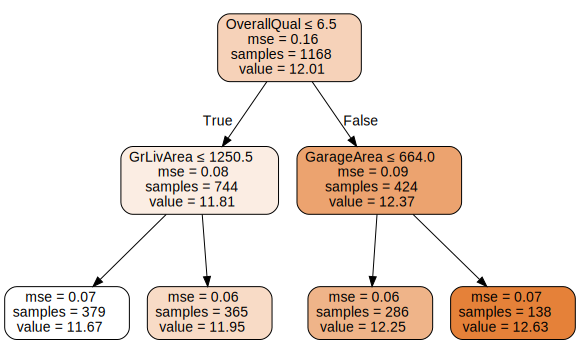

In [22]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

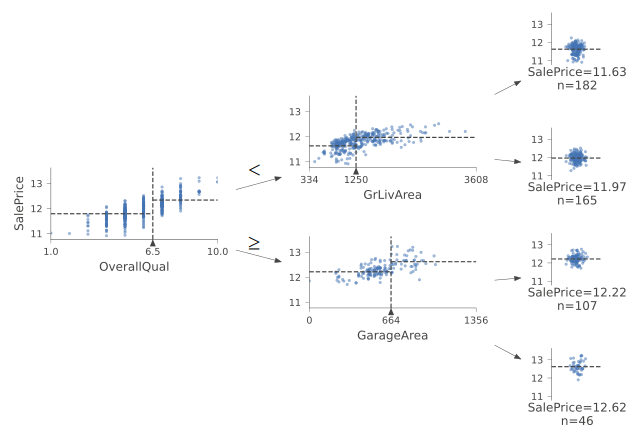

In [23]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [24]:
m = DecisionTreeRegressor()
m.fit(xs, y);
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.0, 0.200325)

In [25]:
m.get_n_leaves(), len(xs)

(1115, 1168)

In [26]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.164471, 0.193888)

In [27]:
m.get_n_leaves()

35

In [28]:
# Random Forests

In [29]:
def rf(xs, y, n_estimators=40, max_samples=1168,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)


In [30]:
m = rf(xs, y);

In [31]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.098381, 0.13307)

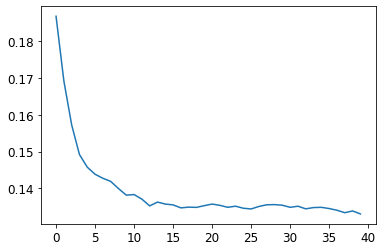

In [32]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
# let's see what happens to the RMSE as we add more and more trees. 
# As you can see, the improvement levels off quite a bit after around 30 trees:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

In [33]:
r_mse(m.oob_prediction_, y)

0.150319

In [34]:
# IMPORTANCE OF FEATURES / Removing Low-Importance Variables

In [35]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [36]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
50,OverallQual,0.333642
62,GrLivArea,0.148016
52,YearBuilt,0.114840
58,TotalBsmtSF,0.060714
72,GarageCars,0.049052
73,GarageArea,0.044136
59,1stFlrSF,0.031362
18,ExterQual,0.022078
55,BsmtFinSF1,0.020760
70,Fireplaces,0.020526


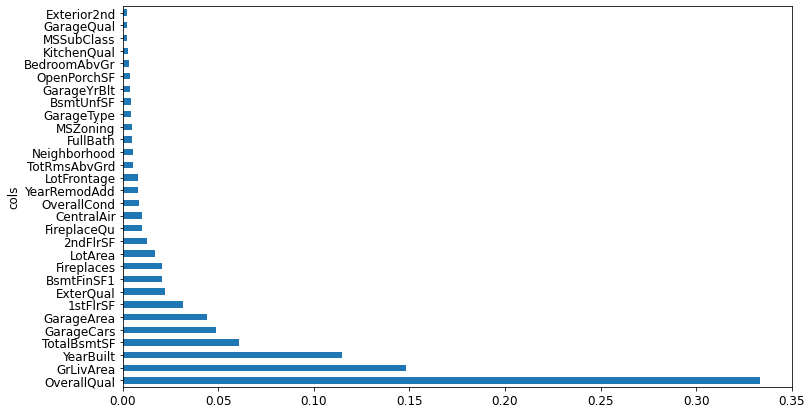

In [37]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

In [38]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

20

In [39]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]


In [40]:
m = rf(xs_imp, y)
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.103873, 0.134273)

In [41]:
len(xs.columns), len(xs_imp.columns)

(83, 20)

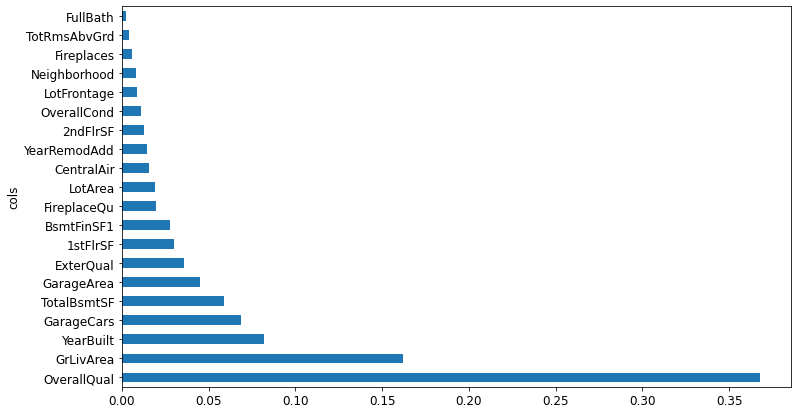

In [42]:
plot_fi(rf_feat_importance(m, xs_imp));

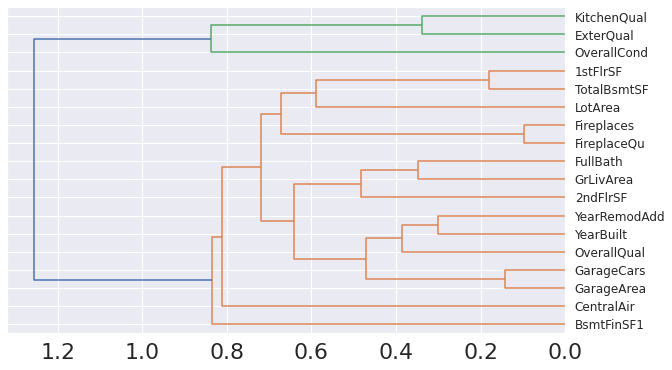

In [199]:
cluster_columns(xs_imp)

In [201]:
get_oob(xs_imp)


0.8466574004521856

In [202]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in xs_imp.columns}

{'OverallQual': 0.8294212248892667,
 'GrLivArea': 0.8392771745243028,
 'YearBuilt': 0.8479209049104764,
 'GarageArea': 0.8520944410088711,
 'TotalBsmtSF': 0.8467537634510748,
 'FullBath': 0.8535968721411847,
 'GarageCars': 0.848725437505404,
 '1stFlrSF': 0.8506253302817922,
 'ExterQual': 0.8489639970655378,
 '2ndFlrSF': 0.849172038452159,
 'BsmtFinSF1': 0.8413506662315038,
 'FireplaceQu': 0.8496141725172843,
 'Fireplaces': 0.8451659820229845,
 'LotArea': 0.8459408085919403,
 'YearRemodAdd': 0.8425834067653992,
 'KitchenQual': 0.8494622190229871,
 'OverallCond': 0.8474773584834133,
 'CentralAir': 0.8441846446105629}

In [206]:
to_drop = ['FireplaceQu', 'Neighborhood', 'GarageArea']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8494956480344673

In [207]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [50]:
m = rf(xs_final, y)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(0.107667, 0.129221)

In [51]:
# Partial Dependence

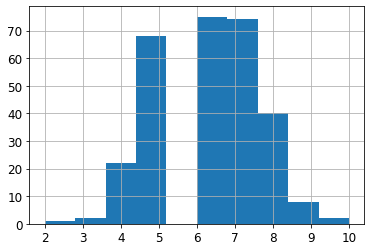

In [52]:
ax1 = valid_xs_final['OverallQual'].hist()
# OverallQual: Rates the overall material and finish of the house

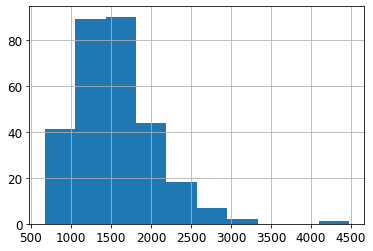

In [53]:
ax2 = valid_xs_final['GrLivArea'].hist()
# GrLivArea: Above grade (ground) living area square feet

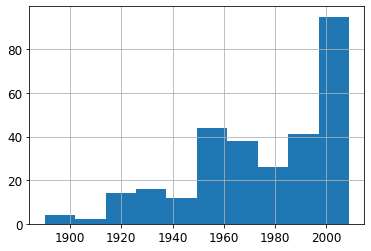

In [54]:
ax3 = valid_xs_final['YearBuilt'].hist()
# YearBuilt: Original construction date

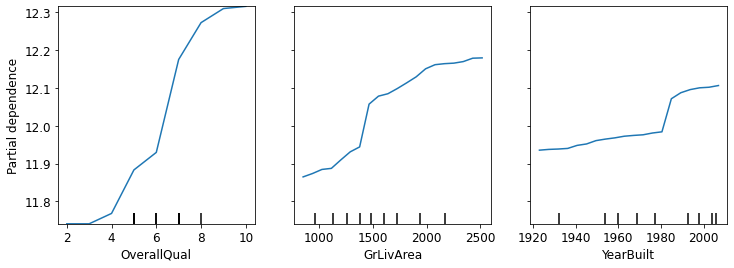

In [55]:
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 4))
plot_partial_dependence(m, valid_xs_final, ['OverallQual','GrLivArea', 'YearBuilt'],
                        grid_resolution=20, ax=ax);

In [56]:
toTest = TabularPandas(test, procs=procs, cat_names = cat, cont_names = cont)
X_test= toTest.train.xs
X_test = X_test[to_keep]
X_test = X_test.drop(to_drop, axis=1)

In [57]:
y_pred=m.predict(X_test)
y_pred = np.exp(y_pred)
y_pred = y_pred.astype(int)

In [58]:
# output= pd.DataFrame({'Id':test.Id, 'SalePrice': y_pred})
# output.to_csv('submission1_nar_housePrice.csv', index=False)
# output.head()

# score 0.14948 on kaggle board

In [262]:
# Lets try with a NN (on a other notebook : nnHousePrice)

In [78]:
# Now let's try to improve our score

In [79]:
train = pd.read_csv(path/'train.csv')
test = pd.read_csv(path/'test.csv')

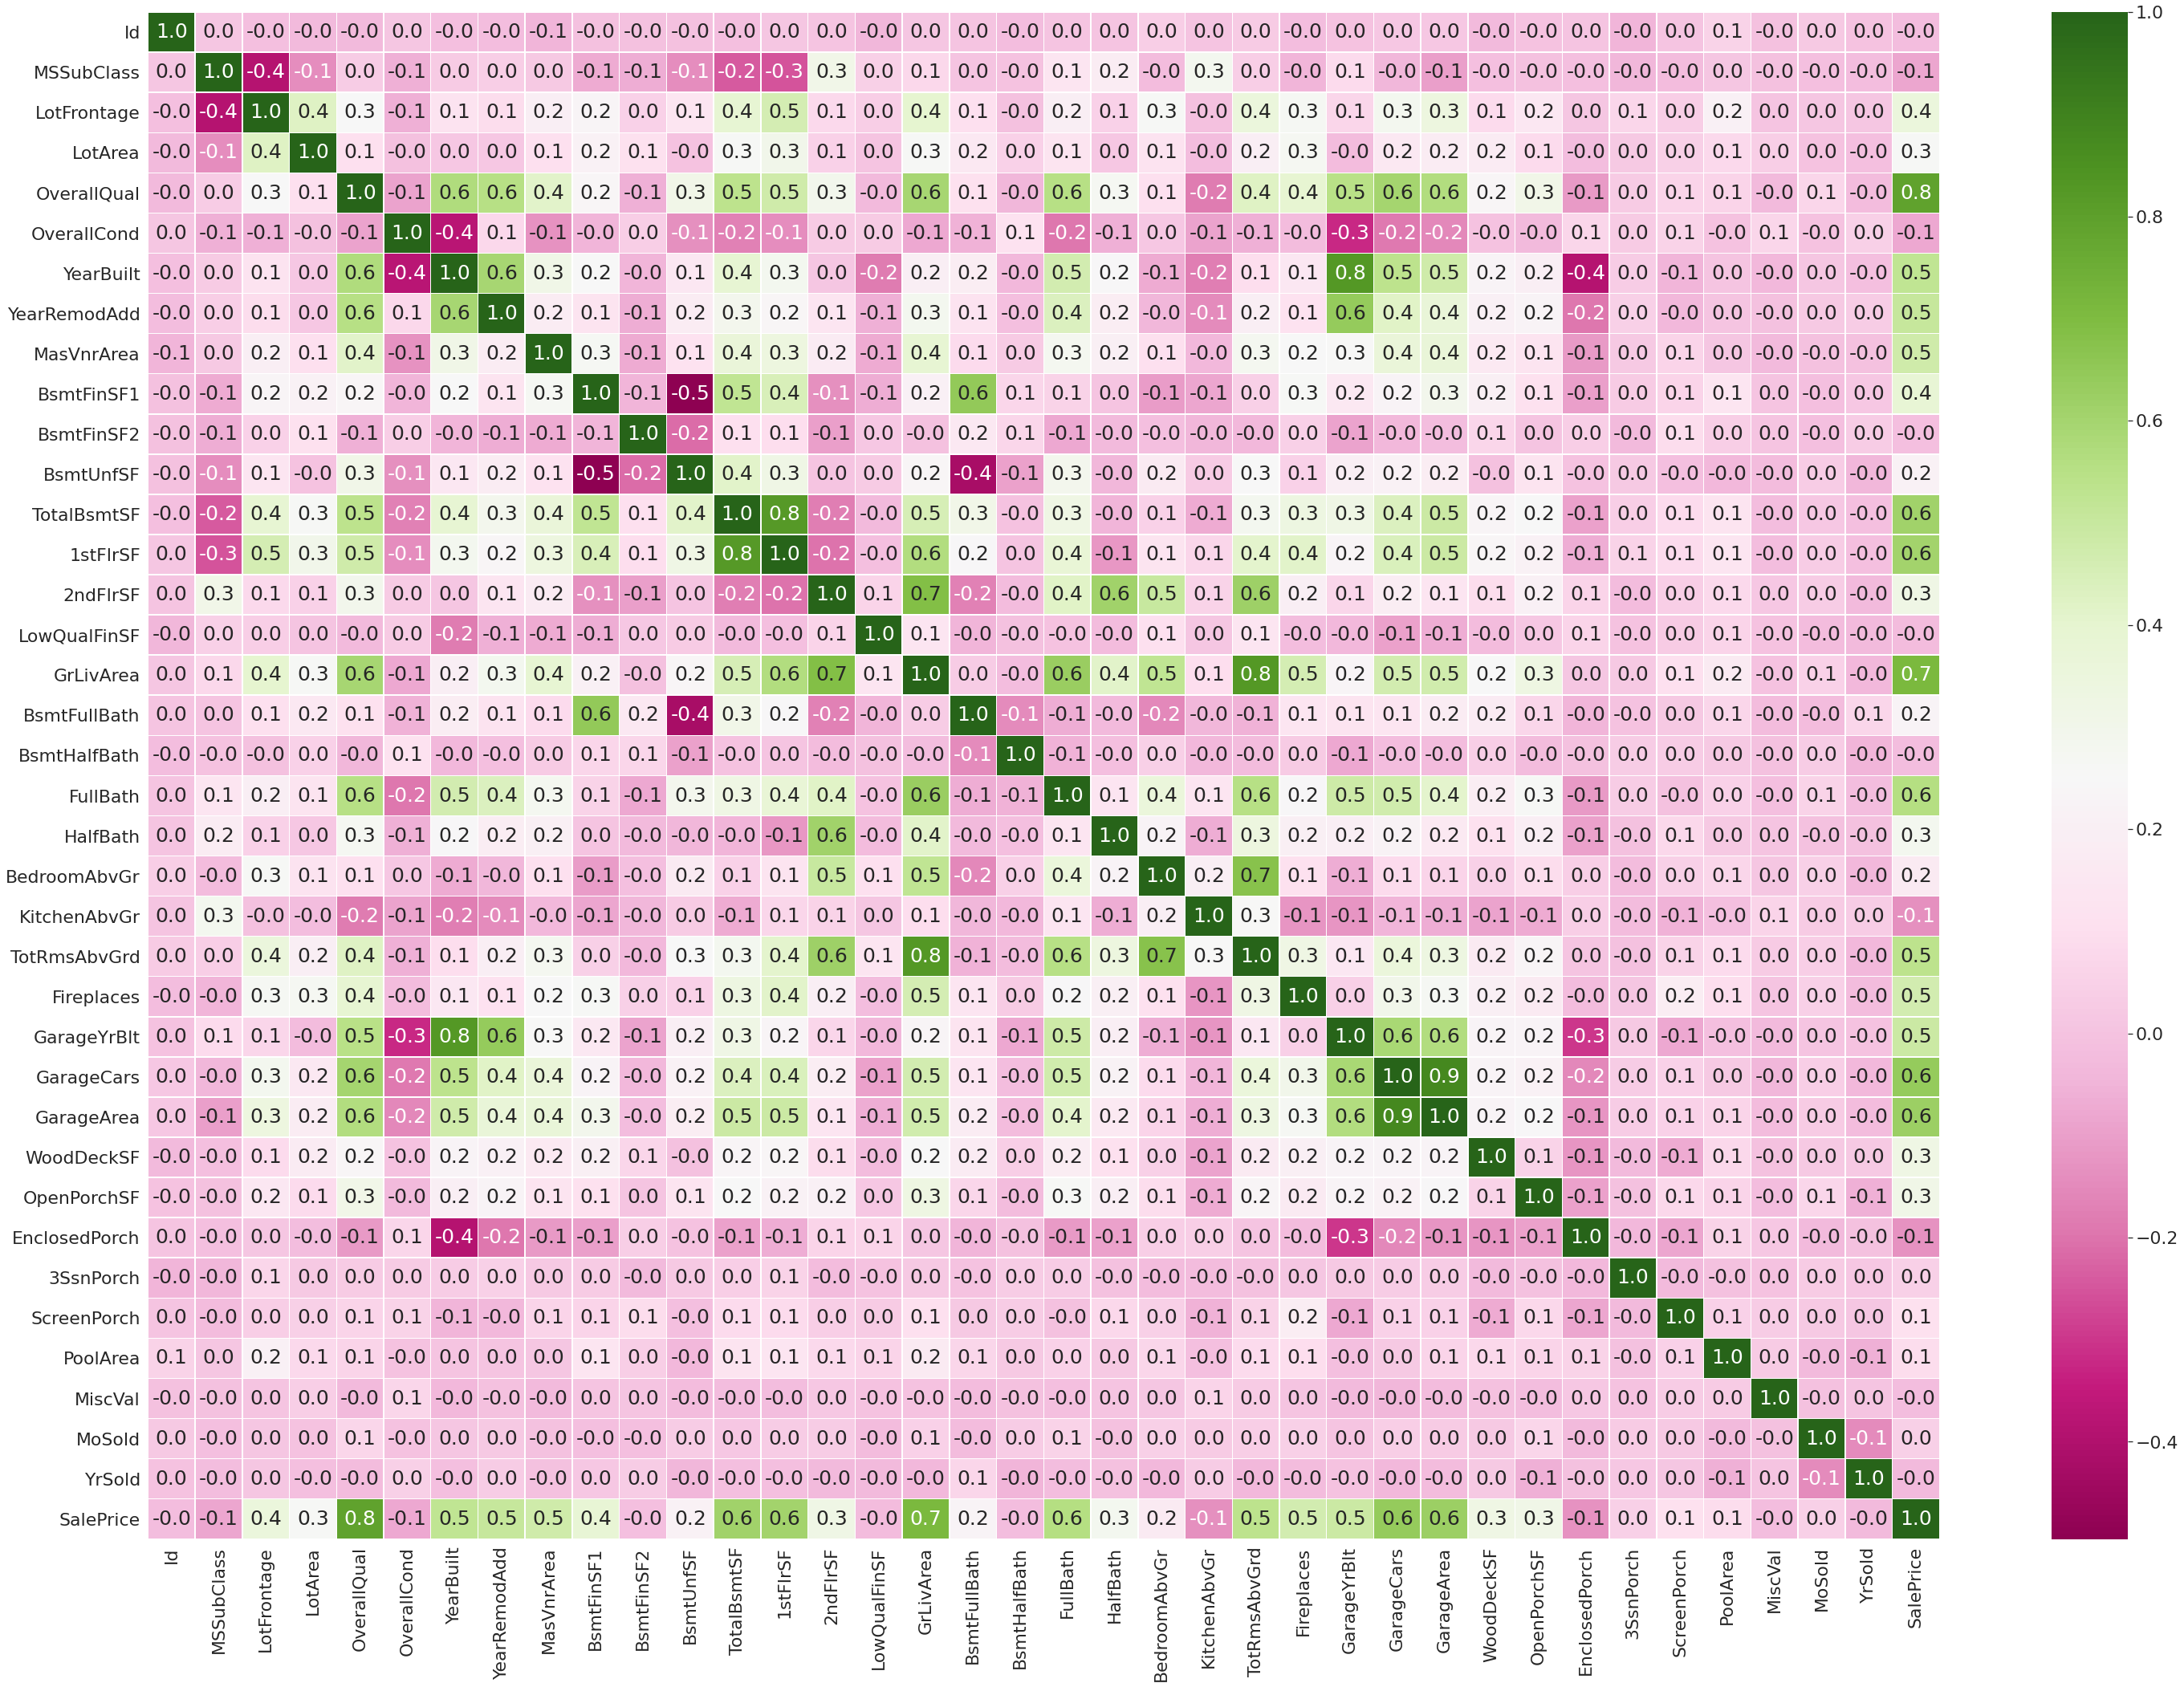

In [80]:
correlation_train=train.corr()
sb.set(font_scale=2)
plt.figure(figsize = (50,35))
ax = sb.heatmap(correlation_train, annot=True,annot_kws={"size": 25},fmt='.1f',cmap='PiYG', linewidths=.5)

In [81]:
corr_dict=correlation_train['SalePrice'].sort_values(ascending=False).to_dict()
important_columns=[]
for key,value in corr_dict.items():
    if ((value>0.1) & (value<0.9)) | (value<=-0.1):
        important_columns.append(key)
important_columns

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'EnclosedPorch',
 'KitchenAbvGr']

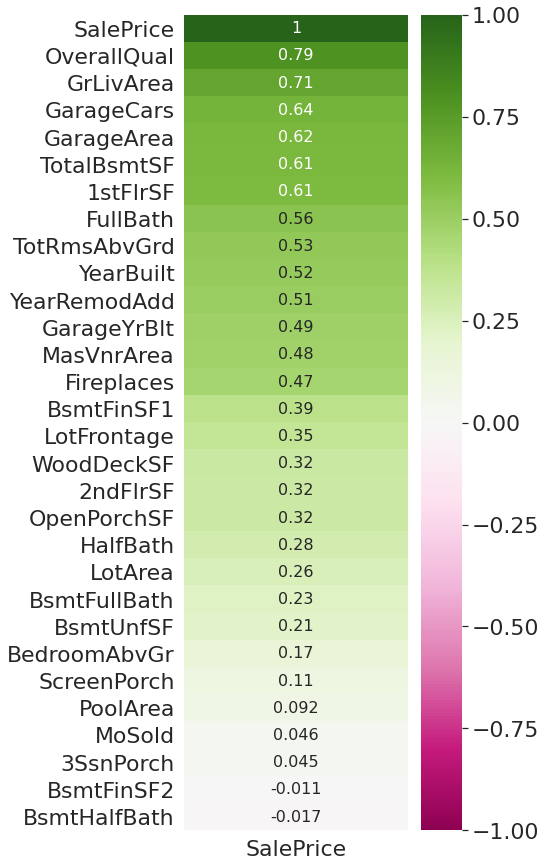

In [82]:
corr_new_train=train.corr()
plt.figure(figsize=(5,15))
sb.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sb.set(font_scale=2)

In [83]:
corr_dict2=corr_new_train['SalePrice'].sort_values(ascending=False).to_dict()
corr_dict2

{'SalePrice': 1.0,
 'OverallQual': 0.7909816005838047,
 'GrLivArea': 0.7086244776126511,
 'GarageCars': 0.640409197258349,
 'GarageArea': 0.6234314389183598,
 'TotalBsmtSF': 0.6135805515591944,
 '1stFlrSF': 0.6058521846919166,
 'FullBath': 0.5606637627484452,
 'TotRmsAbvGrd': 0.5337231555820238,
 'YearBuilt': 0.5228973328794967,
 'YearRemodAdd': 0.5071009671113867,
 'GarageYrBlt': 0.48636167748786213,
 'MasVnrArea': 0.4774930470957107,
 'Fireplaces': 0.4669288367515242,
 'BsmtFinSF1': 0.38641980624215627,
 'LotFrontage': 0.35179909657067854,
 'WoodDeckSF': 0.32441344456813076,
 '2ndFlrSF': 0.31933380283206614,
 'OpenPorchSF': 0.31585622711605577,
 'HalfBath': 0.2841076755947784,
 'LotArea': 0.2638433538714063,
 'BsmtFullBath': 0.22712223313149718,
 'BsmtUnfSF': 0.214479105546969,
 'BedroomAbvGr': 0.1682131543007415,
 'ScreenPorch': 0.11144657114291048,
 'PoolArea': 0.09240354949187278,
 'MoSold': 0.04643224522381936,
 '3SsnPorch': 0.04458366533574792,
 'BsmtFinSF2': -0.0113781214502152

In [84]:
best_columns=[]
for key,value in corr_dict2.items():
    if ((value>=0.3175) & (value<0.9)) | (value<=-0.315):
        best_columns.append(key)
best_columns

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF']

In [85]:
len(best_columns)

17

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 [Text(1, 0, 'OverallQual'),
  Text(2, 0, 'GrLivArea'),
  Text(3, 0, 'GarageCars'),
  Text(4, 0, 'GarageArea'),
  Text(5, 0, 'TotalBsmtSF'),
  Text(6, 0, '1stFlrSF'),
  Text(7, 0, 'FullBath'),
  Text(8, 0, 'TotRmsAbvGrd'),
  Text(9, 0, 'YearBuilt'),
  Text(10, 0, 'YearRemodAdd'),
  Text(11, 0, 'GarageYrBlt'),
  Text(12, 0, 'MasVnrArea'),
  Text(13, 0, 'Fireplaces'),
  Text(14, 0, 'BsmtFinSF1'),
  Text(15, 0, 'LotFrontage'),
  Text(16, 0, 'WoodDeckSF'),
  Text(17, 0, '2ndFlrSF')])

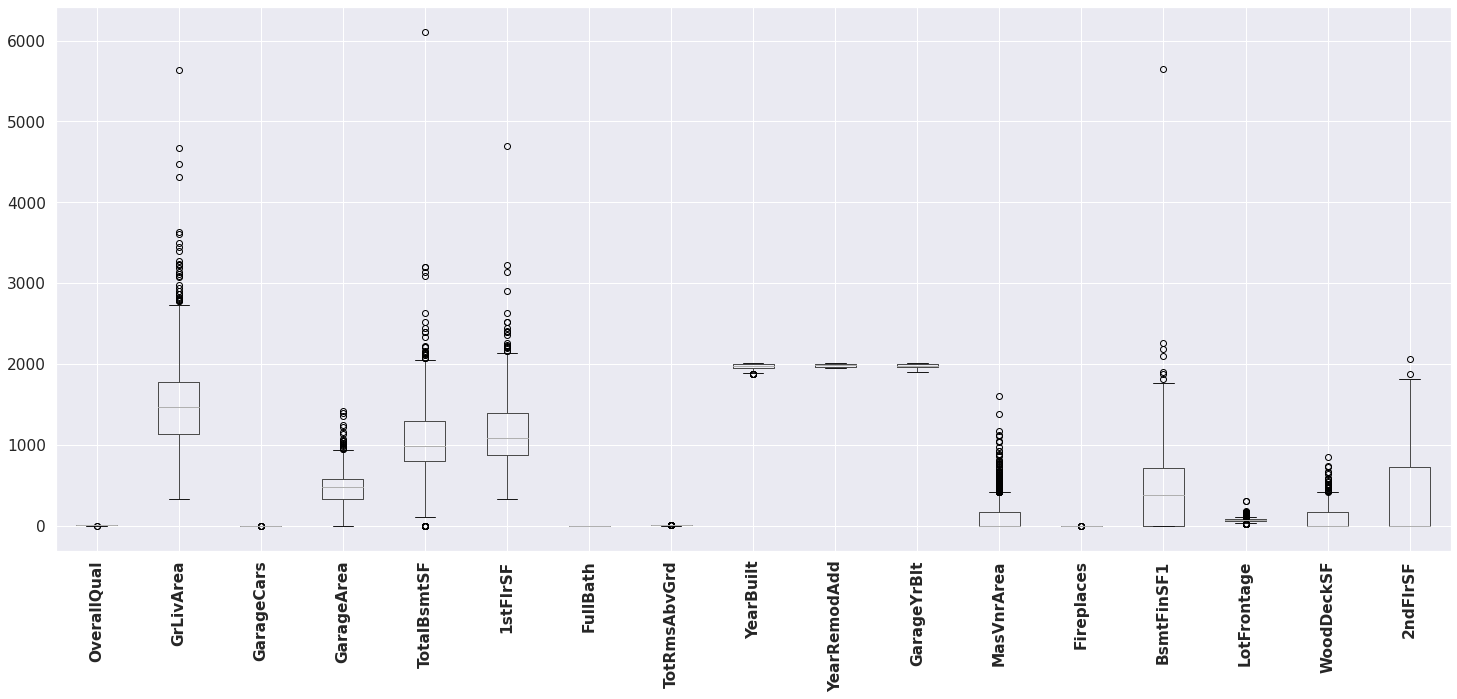

In [86]:
plt.figure(figsize=(25,10))
sb.set(font_scale=1.4)
train.boxplot(column=best_columns)
plt.xticks(weight='bold',rotation=90)

/opt/conda/envs/fastai/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skew Dist: 1.8828757597682129
Kurtosis Dist: 6.536281860064529


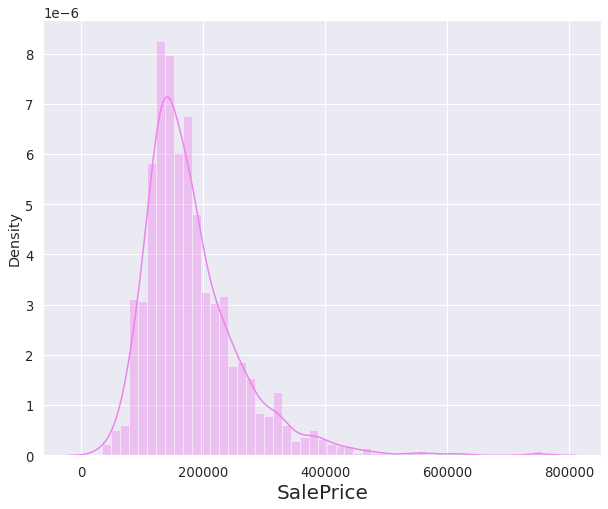

In [87]:
plt.figure(figsize=(10,8))
sb.set(font_scale=1.2)
sb.distplot(train['SalePrice'],color='violet')
plt.xlabel('SalePrice',fontsize=20)
print('Skew Dist:',train['SalePrice'].skew())
print('Kurtosis Dist:',train['SalePrice'].kurt())

In [88]:
# removing the outliers

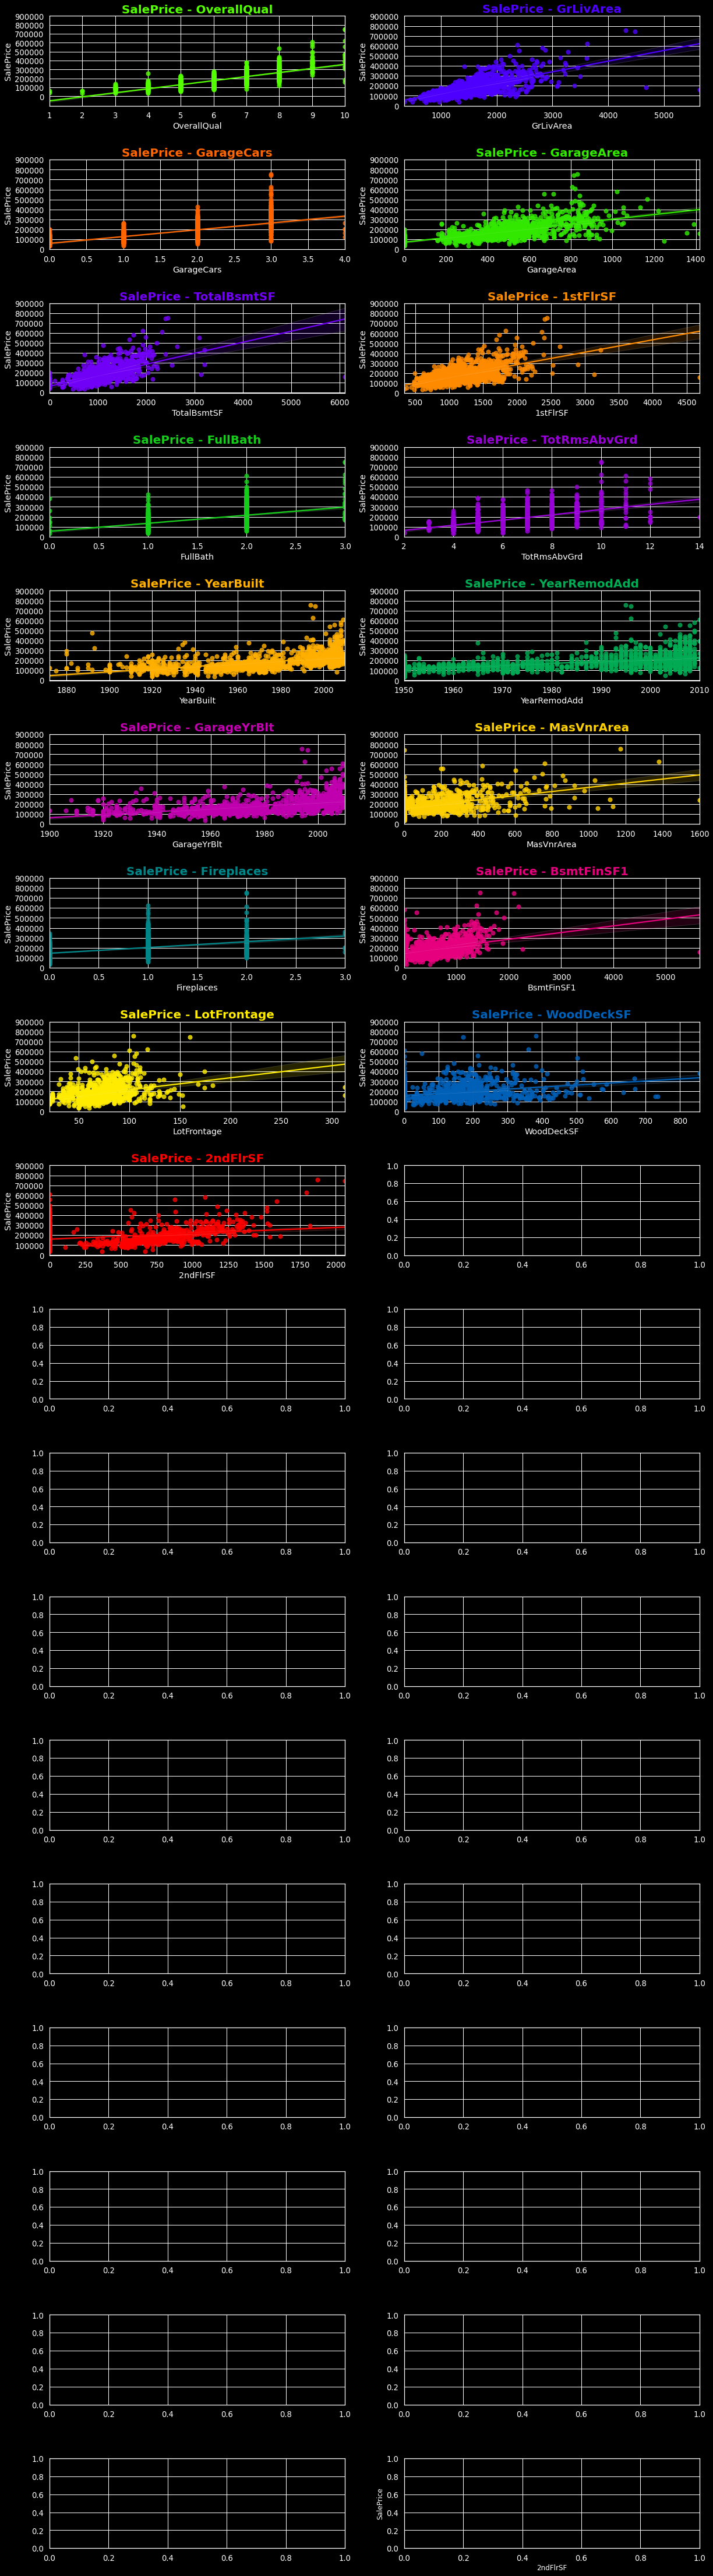

In [89]:
plt.style.use('dark_background')
fig, axes = plt.subplots(18, 2,figsize=(20,80))
fig.subplots_adjust(hspace=0.6)
colors=[plt.cm.prism_r(each) for each in np.linspace(0, 1, len(best_columns))]
for i,ax,color in zip(best_columns,axes.flatten(),colors):
    sb.regplot(x=train[i], y=train["SalePrice"], fit_reg=True,marker='o',scatter_kws={'s':50,'alpha':0.8},color=color,ax=ax)
    plt.xlabel(i,fontsize=12)
    plt.ylabel('SalePrice',fontsize=12)
    ax.set_yticks(np.arange(0,900001,100000))
    ax.set_title('SalePrice'+' - '+str(i),color=color,fontweight='bold',size=20)


In [90]:
train = train.drop(train[(train.OverallQual==4) & (train.SalePrice>200000)].index)
train = train.drop(train[(train.OverallQual==10) & (train.SalePrice<200000)].index)
train = train.drop(train[(train.GrLivArea>3500) & (train.SalePrice<200000)].index)
train = train.drop(train[(train.GrLivArea<3000) & (train.SalePrice>575000)].index)
train = train.drop(train[(train.GarageArea>1200) & (train.SalePrice<165000)].index)
train = train.drop(train[(train.TotRmsAbvGrd==10) & (train.SalePrice>700000)].index)
train = train.drop(train[(train.YearBuilt<1900) & (train.SalePrice>250000)].index)
train = train.drop(train[(train.YearBuilt>2000) & (train.SalePrice<100000)].index)
train = train.drop(train[(train.YearRemodAdd<1970) & (train.SalePrice>350000)].index)
train = train.drop(train[(train.MasVnrArea>=1400) & (train.SalePrice<250000)].index)
train = train.drop(train[(train.GarageYrBlt<1960) & (train.SalePrice>340000)].index)
train = train.drop(train[(train.LotFrontage>150) & (train.SalePrice<100000)].index)
train = train.drop(train[(train.BsmtFinSF1>2000) & (train.SalePrice<200000)].index)



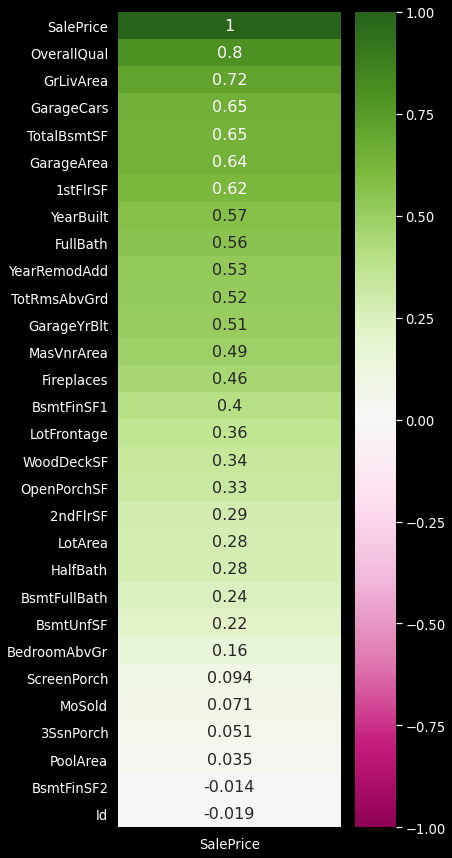

In [91]:
corr_new_train=train.corr()
plt.figure(figsize=(5,15))
sb.heatmap(corr_new_train[['SalePrice']].sort_values(by=['SalePrice'],ascending=False).head(30),annot_kws={"size": 16},vmin=-1, cmap='PiYG', annot=True)
sb.set(font_scale=2)

In [92]:
# checking how the score will evolve

In [93]:
# train[dep_var] = np.log(train[dep_var])
# train.drop('SalePrice_Log1p', axis=1)
cont,cat = cont_cat_split(train, 1, dep_var=dep_var)
splits = RandomSplitter(valid_pct=0.2)(range_of(train))
to = TabularPandas(train, procs, cat, cont, y_names=dep_var, splits=splits)
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

xs_best = xs[best_columns]
valid_xs_best = valid_xs[best_columns]


m = rf(xs_best, y, max_samples = 867);
m_rmse(m, xs_best, y), m_rmse(m, valid_xs_best, valid_y)


(19669.938524, 29521.572554)

In [94]:
toTest = TabularPandas(test, procs=procs, cat_names = cat, cont_names = cont)
X_test= toTest.train.xs
X_test = X_test[best_columns]


In [95]:
y_pred=m.predict(X_test)
# y_pred = np.exp(y_pred)
y_pred = y_pred.astype(int)

In [96]:
output= pd.DataFrame({'Id':test.Id, 'SalePrice': y_pred})
# output.to_csv('submission3_nar_housePrice.csv', index=False)
output.head()

# score 0.16085 on kaggle board

,Id,SalePrice
0,1461,125611
1,1462,156398
2,1463,174511
3,1464,182958
4,1465,192721


In [147]:
# let's play again with the tree

In [148]:
train = pd.read_csv(path/'train.csv')
test = pd.read_csv(path/'test.csv')

In [149]:
dep_var = 'SalePrice'
train[dep_var] = np.log(train[dep_var])
train[dep_var] 

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [150]:
procs = [Categorify, FillMissing]

In [151]:
cont,cat = cont_cat_split(train, 1, dep_var=dep_var)
splits = RandomSplitter(valid_pct=0.2)(range_of(train))
to = TabularPandas(train, procs, cat, cont, y_names=dep_var, splits=splits)

In [152]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [154]:
m = rf(xs, y);

In [155]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.093713, 0.152444)

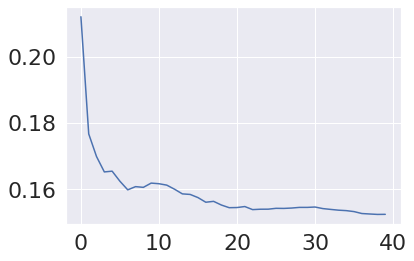

In [156]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])
# let's see what happens to the RMSE as we add more and more trees. 
# As you can see, the improvement levels off quite a bit after around 30 trees:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

In [153]:
def rf(xs, y, n_estimators=40, max_samples=1168,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [167]:
for i in [0.1, 0.3, 0.5, 0.7, 0.9]:
    m = rf(xs, y, max_features=i)
    m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)
    print(m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y),i)

0.116113 0.155869 0.1
0.099672 0.152992 0.3
0.095655 0.153561 0.5
0.092912 0.156926 0.7
0.09319 0.163103 0.9


In [162]:
max_features = 0.3

In [171]:
for i in range(1, 15):
    m = rf(xs, y, max_features=max_features, min_samples_leaf = i)
    m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)
    print(m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y),i)

0.053608 0.148195 1
0.065785 0.1524 2
0.081917 0.153664 3
0.092236 0.149503 4
0.098639 0.15484 5
0.106378 0.153259 6
0.111435 0.155327 7
0.114676 0.154813 8
0.119315 0.153436 9
0.122974 0.156624 10
0.12616 0.15492 11
0.129556 0.159459 12
0.13292 0.159204 13
0.132034 0.156339 14


In [172]:
min_samples_leaf = 1

In [184]:
m = rf(xs, y, max_features=max_features, min_samples_leaf = min_samples_leaf)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(0.054046, 0.148897)

In [174]:
fi = rf_feat_importance(m, xs)
fi[:20]

,cols,imp
50,OverallQual,0.230900
62,GrLivArea,0.114149
52,YearBuilt,0.096227
73,GarageArea,0.065279
58,TotalBsmtSF,0.056414
65,FullBath,0.052622
72,GarageCars,0.050204
59,1stFlrSF,0.046033
18,ExterQual,0.027411
60,2ndFlrSF,0.021255


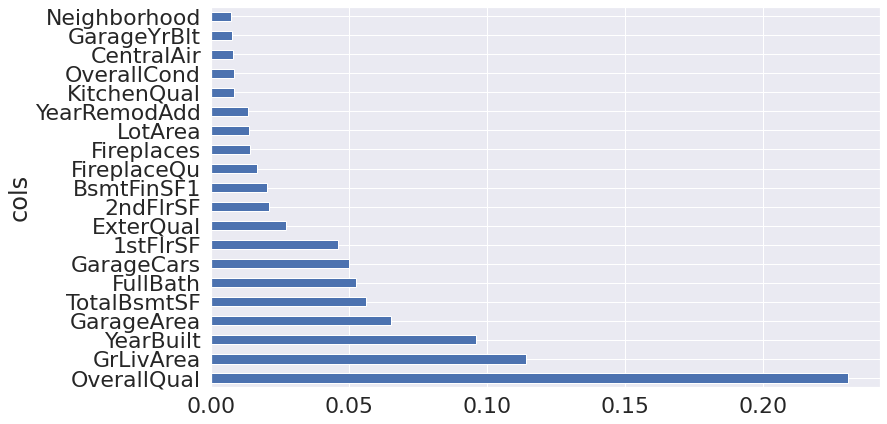

In [176]:
plot_fi(fi[:20]);

In [179]:
to_keep = fi[fi.imp>0.008].cols
len(to_keep)

18

In [180]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [197]:
m = rf(xs_imp, y,  max_features=max_features, min_samples_leaf = min_samples_leaf)
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(0.052814, 0.149789)

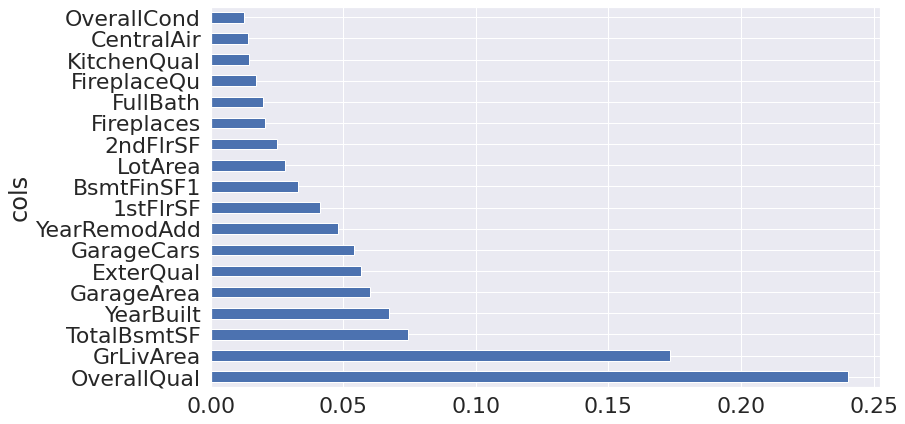

In [198]:
plot_fi(rf_feat_importance(m, xs_imp));

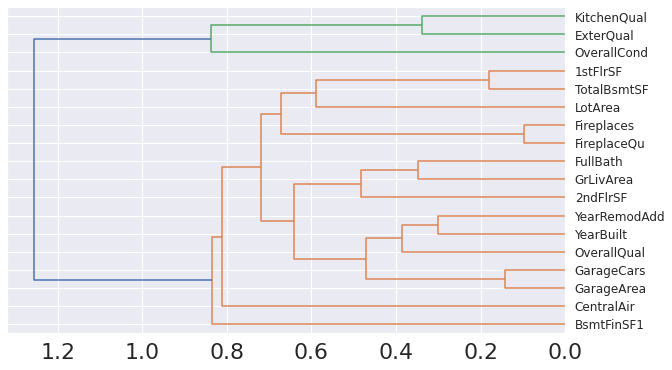

In [208]:
cluster_columns(xs_imp)

In [209]:
get_oob(xs_imp)


0.8499063383964252

In [210]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in xs_imp.columns}

{'OverallQual': 0.830184819412839,
 'GrLivArea': 0.8375136791681259,
 'YearBuilt': 0.841004864382249,
 'GarageArea': 0.8455734535413876,
 'TotalBsmtSF': 0.8487855795686561,
 'FullBath': 0.8483330480755236,
 'GarageCars': 0.8448192451871741,
 '1stFlrSF': 0.8481958312350107,
 'ExterQual': 0.8449805359443217,
 '2ndFlrSF': 0.8484319017353205,
 'BsmtFinSF1': 0.8413574137561097,
 'FireplaceQu': 0.8474647542670752,
 'Fireplaces': 0.8476400620862599,
 'LotArea': 0.8427622318627052,
 'YearRemodAdd': 0.8465847488046858,
 'KitchenQual': 0.8473450210664029,
 'OverallCond': 0.847057795811499,
 'CentralAir': 0.8455043729298723}

In [211]:
to_drop = ['FullBath', 'Fireplaces']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8470218763189366

In [212]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [219]:
m = rf(xs_final, y,  max_features=max_features, min_samples_leaf = min_samples_leaf)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)

(0.054052, 0.15014)

In [220]:
toTest = TabularPandas(test, procs=procs, cat_names = cat, cont_names = cont)
X_test= toTest.train.xs
X_test = X_test[to_keep]
X_test = X_test.drop(to_drop, axis=1)

In [221]:
y_pred=m.predict(X_test)
y_pred = np.exp(y_pred)
y_pred = y_pred.astype(int)

In [222]:
output= pd.DataFrame({'Id':test.Id, 'SalePrice': y_pred})
# output.to_csv('submission4_nar_housePrice.csv', index=False)
output.head()

# Your submission scored 0.14699, which is an improvement of your previous score of 0.14948. Great job!

,Id,SalePrice
0,1461,121354
1,1462,151456
2,1463,166151
3,1464,180241
4,1465,191219


In [364]:
# let's apply what we did with the outliers and see with this forest how it changes

In [365]:
train = train.drop(train[(train.OverallQual==4) & (train.SalePrice>200000)].index)
train = train.drop(train[(train.OverallQual==10) & (train.SalePrice<200000)].index)
train = train.drop(train[(train.GrLivArea>3500) & (train.SalePrice<200000)].index)
train = train.drop(train[(train.GrLivArea<3000) & (train.SalePrice>575000)].index)
train = train.drop(train[(train.GarageArea>1200) & (train.SalePrice<165000)].index)
train = train.drop(train[(train.TotRmsAbvGrd==10) & (train.SalePrice>700000)].index)
train = train.drop(train[(train.YearBuilt<1900) & (train.SalePrice>250000)].index)
train = train.drop(train[(train.YearBuilt>2000) & (train.SalePrice<100000)].index)
train = train.drop(train[(train.YearRemodAdd<1970) & (train.SalePrice>350000)].index)
train = train.drop(train[(train.MasVnrArea>=1400) & (train.SalePrice<250000)].index)
train = train.drop(train[(train.GarageYrBlt<1960) & (train.SalePrice>340000)].index)
train = train.drop(train[(train.LotFrontage>150) & (train.SalePrice<100000)].index)
train = train.drop(train[(train.BsmtFinSF1>2000) & (train.SalePrice<200000)].index)



In [366]:
cont,cat = cont_cat_split(train, 1, dep_var=dep_var)
splits = RandomSplitter(valid_pct=0.2)(range_of(train))
to = TabularPandas(train, procs, cat, cont, y_names=dep_var, splits=splits)

In [367]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [368]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [370]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

m = rf(xs_final, y, max_samples=867, max_features=max_features, min_samples_leaf = min_samples_leaf)
m_rmse(m, xs_final, y), m_rmse(m, valid_xs_final, valid_y)



(0.055497, 0.14942)

In [372]:
toTest = TabularPandas(test, procs=procs, cat_names = cat, cont_names = cont)
X_test= toTest.train.xs
X_test = X_test[to_keep]
X_test = X_test.drop(to_drop, axis=1)


In [373]:
y_pred=m.predict(X_test)
y_pred = np.exp(y_pred)
y_pred = y_pred.astype(int)


In [375]:
output= pd.DataFrame({'Id':test.Id, 'SalePrice': y_pred})
output.to_csv('submission6_nar_housePrice.csv', index=False)
output.head()

# Your submission scored 0.16050; the outliers didnt help

,Id,SalePrice
0,1461,130509
1,1462,150710
2,1463,175354
3,1464,181422
4,1465,182042
